In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,
Comm: tls://192.168.197.216:8786,Workers: 0
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,Total threads: 0
Started: 12 minutes ago,Total memory: 0 B


In [3]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10p0mm",
    "2Mu2E_200GeV_1p2GeV_48p0mm",
     "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm"
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 # max_files =10
                                 # max_files =1
                                )

In [4]:
channels = [
    # "baseNoLj", 
           "baseNoLj_A_ee_highPtA_lowLxyA",
            "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"],
    lj_reco_choices=["0.4"],
   
)
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    #skipbadfiles=True,
    savemetrics=True,
)
# test if processor is serializable
import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)


[                                        ] | 0% Completed |  0.0s

/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


In [5]:
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"



/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


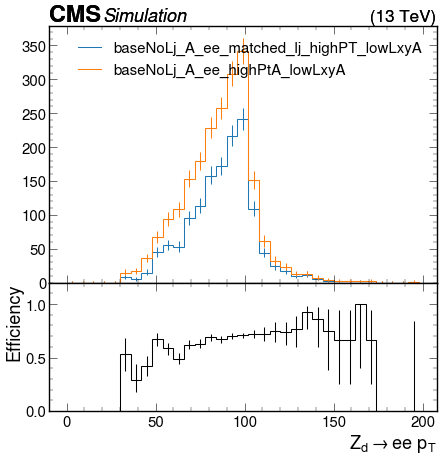

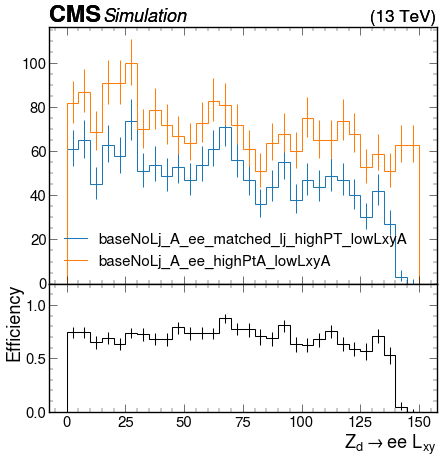

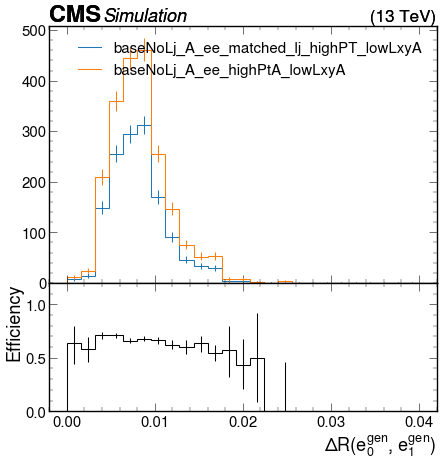

In [6]:
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt"][ch2, ::3j],
           hists["genAs_toE_pt"][ch1, ::3j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XXLowRange"][ch2,::2j ],
           hists["genE_genE_dR_XXLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


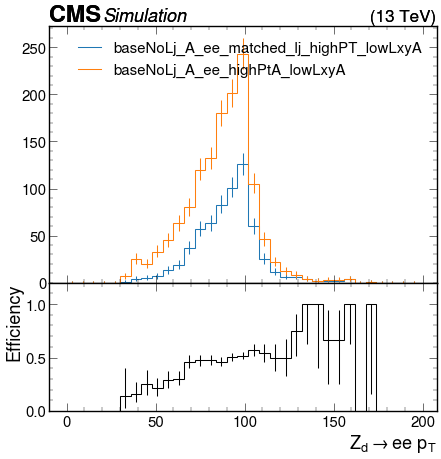

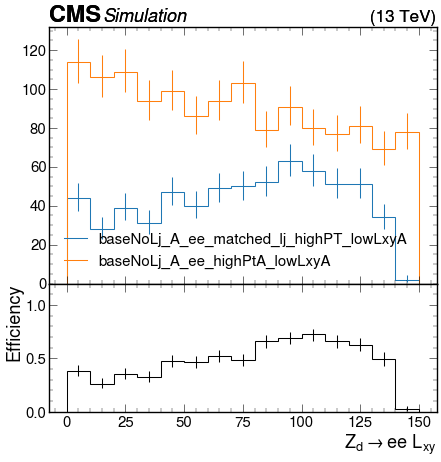

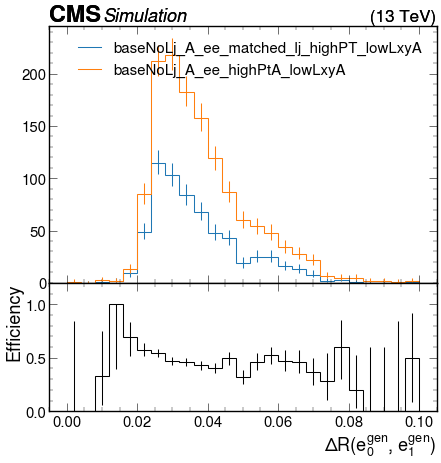

In [7]:
hists = output["out"]["2Mu2E_200GeV_1p2GeV_48p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt"][ch2, ::3j],
           hists["genAs_toE_pt"][ch1, ::3j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, ::2j],
           hists["genAs_toE_lxy"][ch1, ::2j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XLowRange"][ch2, ::2j],
           hists["genE_genE_dR_XLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


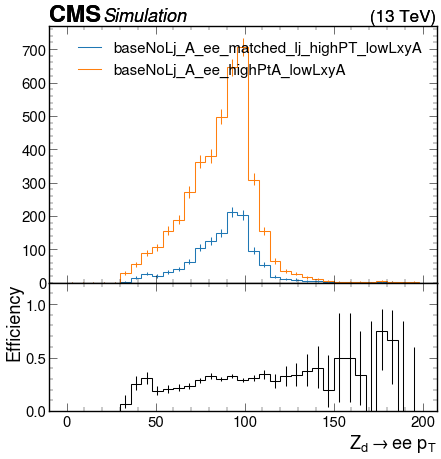

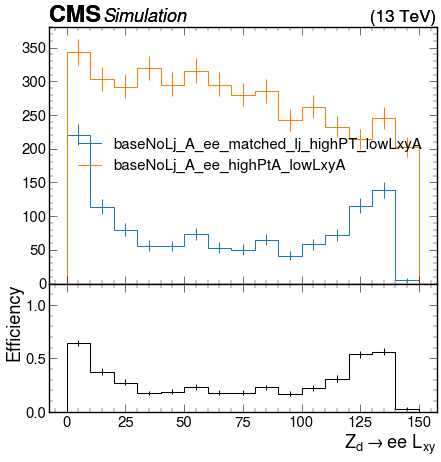

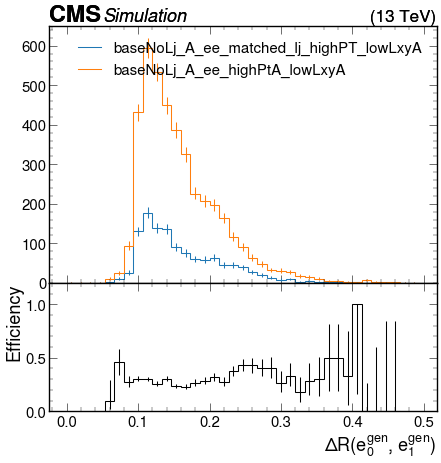

In [8]:
hists = output["out"]["2Mu2E_200GeV_5p0GeV_200p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt"][ch2, ::3j],
           hists["genAs_toE_pt"][ch1, ::3j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, ::2j],
           hists["genAs_toE_lxy"][ch1, ::2j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_lowRange"][ch2, ::2j],
           hists["genE_genE_dR_lowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


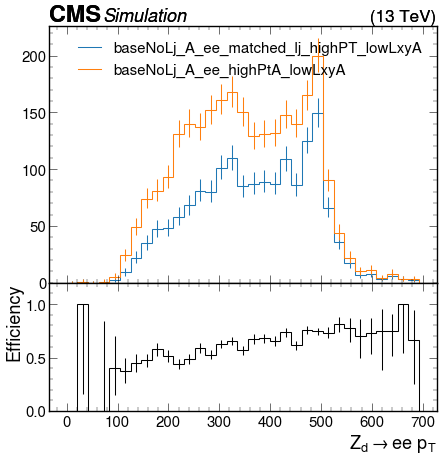

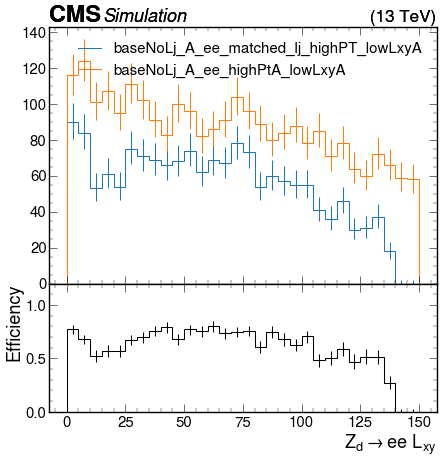

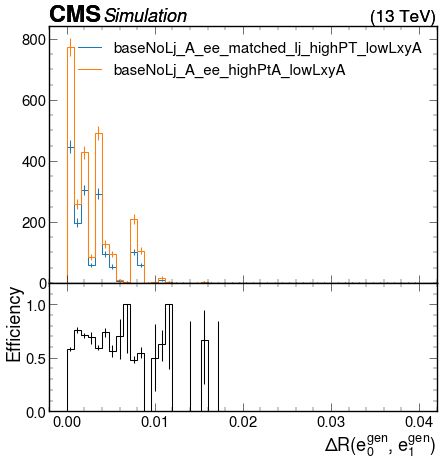

In [9]:
hists = output["out"]["2Mu2E_1000GeV_0p25GeV_2p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch2, ::3j],
           hists["genAs_toE_pt_highRange"][ch1, ::3j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XXLowRange"][ch2, :],
           hists["genE_genE_dR_XXLowRange"][ch1, :], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


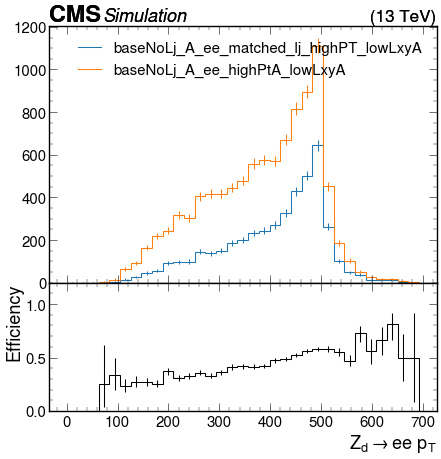

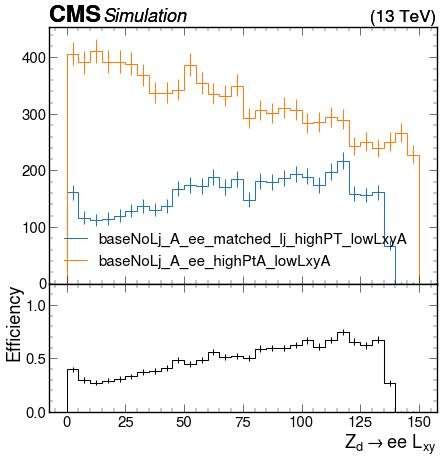

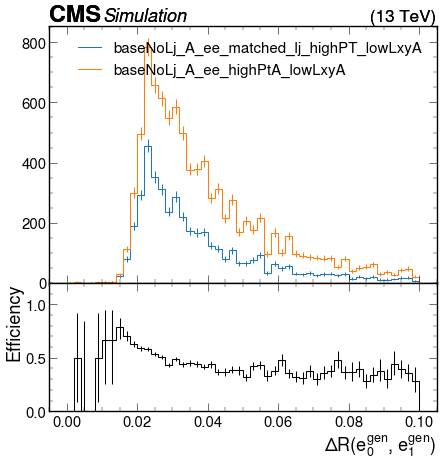

In [10]:
hists = output["out"]["2Mu2E_1000GeV_5p0GeV_40p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch2, ::3j],
           hists["genAs_toE_pt_highRange"][ch1, ::3j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XLowRange"][ch2, :],
           hists["genE_genE_dR_XLowRange"][ch1, :], 
          legend = [ch2, ch1])